# <center>ML Basics </center>
## <center>Inclass Project 1 - MA4144</center>

This project contains 12 tasks/questions to be completed.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

Use this cell to use any include any imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Section 1

In this section we will analyse a dataset to look into its statistical propeties. For this we will use the DiabetesTrain.csv dataset. Each row corresponds to a single patient. The first 8 columns correspond to the features of the patients that may help predict risk of diabetes. The outcome column is a binary column represting the risk of diabetes, outcome 1 : high risk of diabetes and outcome 0 little to no risk of diabetes.

**Q1.** Read the dataset into a pandas dataframe called diabetesData. 

In [2]:
#TODO

diabetesData = pd.read_csv('DiabetesTrain.csv')

In [3]:
diabetesData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,95,74,21,73,25.9,0.673,36,0
1,1,95,82,25,180,35.0,0.233,43,1
2,1,90,68,8,0,24.5,1.138,36,0
3,7,195,70,33,145,25.1,0.163,55,1
4,0,180,66,39,0,42.0,1.893,25,1


**Q2.** Let us define the following events.

A = Patient has BMI less than 25

B = Patient has Glucose level greater than 100

C = Patient has had more than 2 pregnancies

D = Patient has high risk of diabetes

Based on the above definitions determine the following probabilities. Pandas dataframe inbuilt functions such as count, group by, would be useful for this task.

In [4]:
#TODO

#P(A)
P_A = len(diabetesData[diabetesData['BMI'] < 25]) / len(diabetesData)
#P(B)
P_B = len(diabetesData[diabetesData['Glucose'] > 100]) / len(diabetesData)
#P(C)
P_C = len(diabetesData[diabetesData['Pregnancies'] > 2]) / len(diabetesData)
#P(D)
P_D = len(diabetesData[diabetesData['Outcome'] == 1]) / len(diabetesData)


#P(A ∩ D) - Joint probability
P_A_and_D = len(diabetesData[(diabetesData['BMI'] < 25) & (diabetesData['Outcome'] == 1)]) / len(diabetesData)
#P(A|D) - Conditional probability of A given D
P_A_D = P_A_and_D / P_D

#P(B ∩ D) - Joint probability
P_B_and_D = len(diabetesData[(diabetesData['Glucose'] > 100) & (diabetesData['Outcome'] == 1)]) / len(diabetesData)
#P(B|D) - Conditional probability of B given D
P_B_D = P_B_and_D / P_D

#P(C ∩ D) - Joint probability
P_C_and_D = len(diabetesData[(diabetesData['Pregnancies'] > 2) & (diabetesData['Outcome'] == 1)]) / len(diabetesData)
#P(C|D) - Conditional probability of C given D
P_C_D = P_C_and_D / P_D

#Indicate which one out of A, B, C contributes the most towards high risk of diabetes.
#Assign one of 'A', 'B', 'C' to the following variable Q2, indicating your answer.
#Hint: Compute the necessary conditional probabilities and then compare.
# The highest P(X|D) indicates which condition is most prevalent given high diabetes risk
Q2 = 'B'

**Q3.** Now we will compute the covariance and correlation matrices from scratch. For this do not use any inbuilt functions. Follow the steps outlined below. Each step is graded.

**Step1:** Convert the diabetesData dataframe into a 2-dimensional numpy array with the same number of rows and columns as in the dataframe. Name it diabetesX.

In [5]:
#TODO

diabetesX = diabetesData.values

**Step2:** In diabetesX; center every column, by subtracting each column by the column mean and reassign it to diabetesX.

In [6]:
#TODO

column_means = np.mean(diabetesX, axis=0)

#After centering
diabetesX = diabetesX - column_means

**Step3:** Compute the covariance matrix. Use, matrix operations in numpy such as matrix multiplication, matrix transpose and don't forget to average. Assign it to the variable cov.

In [7]:
#TODO
n = diabetesX.shape[0]

cov = np.dot(diabetesX.T, diabetesX) / (n - 1)

**Step4:** Compute the matrix varmat, whose $(i, j)$ entry is $\sqrt{var(i)var(j)}$, where $var(k)$ is the variance of the $k$th column of the diabetesX matrix. The varinces can be extracted from the covariance matrix itself appropriately and varmat can be computed by appropriate matrix multiplication of a column matrix and a row matrix.

In [8]:
#TODO

variances = np.diag(cov)
std_devs = np.sqrt(variances)

varmat = np.outer(std_devs, std_devs)

**Step5:** Use the cov matrix and varmat matrix appropriately to compute the correlational matrix corr. And then use seaborn (sns imported above) to plot an annotated heatmap of the correlation matrix.

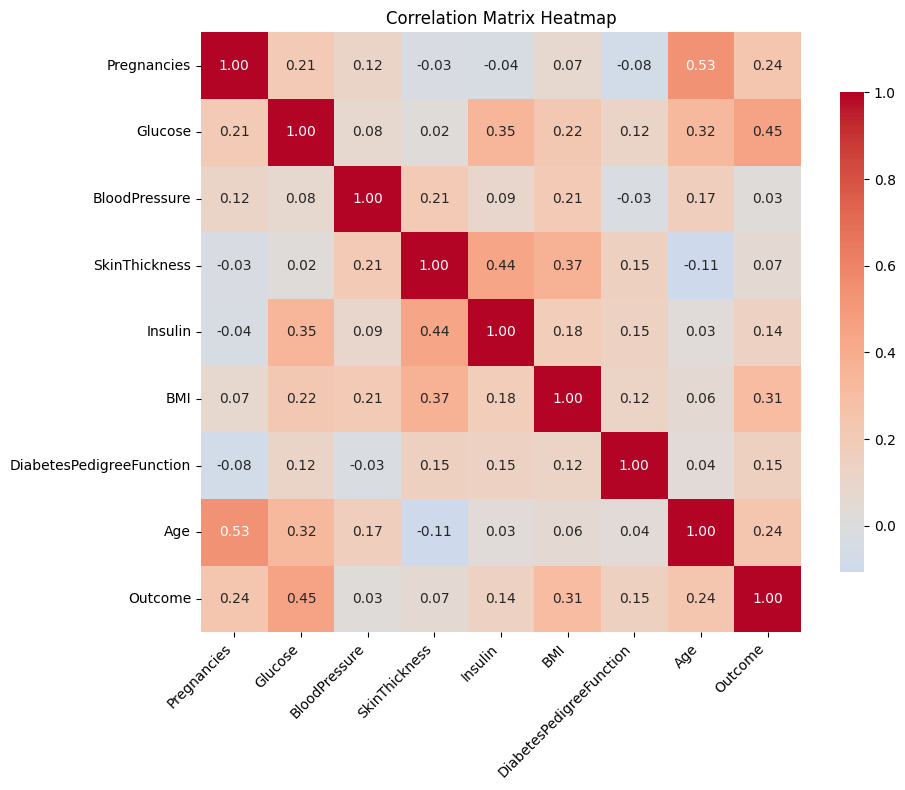

In [9]:
#TODO

corr = cov / varmat

#Plot the heatmap.

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': .8},
            xticklabels=diabetesData.columns,
            yticklabels=diabetesData.columns)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.tight_layout()                   
plt.show()

From the heatmap read the following correlations. Also, answer the question below.

In [10]:
#Corr(BMI, Outcome)
Corr1 = 0.31

#Corr(Glucose, Outcome)
Corr2 = 0.45

#Corr(Pregnancies, Outcome)
Corr3 = 0.24

#Out of the 8 features, which two features are the most correlated. Fill in the list variable bestcorr
bestcorr = ['Pregnancies', 'Age']

## Section 2

In this section we will train a logistic regression model on the diabetes dataset to predict the risk of diabetes given patient data. We will then use it to perform predictions on previously unseen (test) data.

**Q4.** Preprocess Data.
 
Implement a function normalizeData that normalizes each column of a data array. Recall that a column $x$ is normalized by $z = \frac{x - mean(x)}{std(x)}$. The function should return the normalized data matrix and the mean and standard deviations of each column (we'll need these to normalize the test data later).

In [11]:
def normalizeData(X, mean = np.array([]), std = np.array([])):

    #TODO

    # Implement such that if the mean and std are empty arrays then mean and std is calculated here, else use the mean and std passed in as parameters
    if mean.size == 0 or std.size == 0:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    
    
    normalized_X = (X - mean) / std

    return normalized_X, mean, std

**Q5.** Sigmoid function and it's derivative.

1. Implement the sigmoid function. Given a numpy array, compute the sigmoid values of the array. It should return an array of sigmoid values. If you see any overflow errors/warnings popping up, that is because the numbers coming out of the exponential function $e^{-t}$ in the sigmoid function are too large to handle. In that case, please clip the input between some large enough negative and positive value (look into numpy.clip).
2. Implement the derivative of the sigmoid function. Recall that if, $p = \sigma(t)$, then $p' = p(1-p)$. The function should take in an array of $p$ values and then return the array of $p'$. 


In [12]:
#Sigmoid function
def sigmoid(t):

    #TODO

    t = np.clip(t, -500, 500)

    sig = 1.0 / (1.0 + np.exp(-t))
    
    return sig

In [13]:
#Derivative of sigmoid function
def derivSigmoid(p):

    #TODO

    deriv_p = p * (1 - p)

    return deriv_p

**Q6.** Compute sigmoid probabilities.

Recall that $p = P(y = 1 | x) = \sigma(x^T \omega + b)$, where $\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \vdots \\ \omega_d \end{bmatrix}$ are the weights and $b$ is the bias term. Implement a function sigProg to calculate those probabilities, given a matrix $X$ of data, weight vector $\omega$ and bias $b$. It is possible to compute the array of probabilities for the entire dataset at once without a single for-loop, by just using matrix mutltiplications, which is the rightway to achieve maximum efficiency. You are supposed to use the above implemented sigmoid function. This should return an array of probabilities.

In [14]:
def sigProg(X, w, b):

    #TODO
    p = sigmoid(np.dot(X, w) + b)

    return p
    

**Q7.** Compute loss gradient.

Recall that the loss function for logistic regression is given by,

$L(\omega, b) = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i)^2 + \lambda reg(\omega)$ where is the sigmoid probability $p_i = P(y_i = 1 | x_i)$ for the data point $(x_i, y_i)$ and $reg(\omega)$ is the regularization term - it could be either ridge $reg(\omega) = ||\omega||_2^2$ or lasso $reg(\omega) = ||\omega||_1$ or no regularization at all. $\lambda \geq 0$ is the regularization constant. $N$ is the number of datapoints.

Then, the gradient of the loss function with respect to $\omega$ and the derivative with respect to $b$ is given by,

$\nabla_{\omega}L = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i x_i \ + \ \lambda reg'(\omega)$

$\frac{\partial L}{\partial b} = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i) p'_i$

Here,

$reg'(\omega) = \begin{cases} \omega \; &\textrm{ if ridge } \\ sign(\omega) \; &\textrm{ if lasso } \end{cases}$

Implement a function named gradient to compute the gradient and derivative of the loss function, given data matrix $X$, output vector $y$, weight vector $\omega$ and bias $b$. The function should also be able to take in other parameters such as reg (= "none", "ridge" or "lasso") and lambda. It should return the gradient and derivative. All these computations can be done without a single for loop, only by using numpy builtins for matrix computations, which is the most desired way to achieve efficiency 

In [15]:
def gradient(X, y, w, b, reg = "none", Lambda = 0.1):

    #TODO
    N = X.shape[0]

    p = sigProg(X, w, b)

    p_prime = derivSigmoid(p)
    error_term = (p - y) * p_prime

    # Compute gradients with respect to w 
    grad_w = np.dot(X.T, error_term) / N

    # Compute gradient with respect to b
    deriv_b = np.sum(error_term) / N

    # Regularization
    if reg == "ridge":
        grad_w += Lambda * w 
    elif reg == "lasso":
        grad_w += Lambda * np.sign(w)
    else:
        # No regularization
        pass

    return grad_w, deriv_b

**Q8.** Gradient descent algorithm.

Recall the following update rule for gradient descent,

$\omega \leftarrow \omega - \eta \nabla_{\omega} L$

$b \leftarrow b - \eta \frac{\partial L}{\partial b}$

where $\eta > 0$ is the learning rate.

Implement the gradient descent algorithm in a function grad_descent given the gradient vector $\nabla_{\omega} L$ (grad_w), derivative $\frac{\partial L}{\partial b}$ (deriv_b), weights $\omega$ and bias $b$. Also should be able to accept the learning rate $\eta$ (eta). The function should return the updated $\omega$ and $b$.

In [16]:
def grad_descent(grad_w, deriv_b, w, b, eta = 0.01):

    #TODO
    w = w - eta * grad_w
    b = b - eta * deriv_b

    return w, b

**Q9.** Train model

Implement the function train. It should initialize $\omega$ and $b$ to some random values or zeros. Then interatively update the $\omega$ and $b$ using gradient descent, untill the number of interations reach the maximum number of interations specified as max_iter. The function will take in training data $(X, y)$, regularization details (type of reg, and $\lambda$), and learning rate $\eta$ (eta). Finally, it should return the trained $\omega$ and $b$.

In [17]:
def train(X, y, reg = 'none', Lambda = 0.1, eta = 0.01, max_iter = 2000):
    n_features = X.shape[1]
    N = X.shape[0]
    
    # Initialize weights randomly using normal distribution
    w = np.random.normal(0, 0.01, n_features)
    b = np.random.normal(0, 0.01)
    # Lists to store loss values and regularization norms
    losses = []
    reg_norms = []
    
    # Training loop
    for i in range(max_iter):
        # Calculate current predictions
        p = sigProg(X, w, b)
        
        # Calculate loss
        mse_loss = np.mean((p - y) ** 2)
        
        # Add regularization term to loss and store regularization norm
        if reg == "ridge":
            reg_loss = Lambda * np.sum(w ** 2)
            reg_norm = np.sum(w ** 2)  # L2 norm squared
        elif reg == "lasso":
            reg_loss = Lambda * np.sum(np.abs(w))
            reg_norm = np.sum(np.abs(w))  # L1 norm
        else:
            reg_loss = 0
            reg_norm = 0
            
        total_loss = mse_loss + reg_loss
        losses.append(total_loss)
        reg_norms.append(reg_norm)
        
        # Calculate gradients and update weights
        grad_w, deriv_b = gradient(X, y, w, b, reg, Lambda)
        w, b = grad_descent(grad_w, deriv_b, w, b, eta)
        
    return w, b, losses, reg_norms

**Q10.** Predict using the model
a
Implement a function predict to output predictions for given input data $X$, trained weights $\omega$ and $b$. Make sure that the output should only consist of $1$'s and $0$'s. The function should return the predictions $\hat{y}$ (yhat).

In [18]:
def predict(X, w, b, threshold=0.5):

    #TODO
    probabilities = sigProg(X, w, b)

    yhat = (probabilities >= threshold).astype(int)

    return yhat

# Function to find optimal threshold
def find_optimal_threshold(X, y, w, b, metric='accuracy'):
    """
    Find optimal threshold based on different metrics
    """
    probabilities = sigProg(X, w, b)
    thresholds = np.linspace(0.1, 0.9, 81)  # Test thresholds from 0.1 to 0.9
    
    best_threshold = 0.5
    best_score = 0
    
    scores = []
    
    for thresh in thresholds:
        y_pred = (probabilities >= thresh).astype(int)
        
        if metric == 'accuracy':
            score = np.mean(y_pred == y)
        elif metric == 'f1':
            # Calculate F1 score manually
            tp = np.sum((y_pred == 1) & (y == 1))
            fp = np.sum((y_pred == 1) & (y == 0))
            fn = np.sum((y_pred == 0) & (y == 1))
            
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        elif metric == 'precision':
            tp = np.sum((y_pred == 1) & (y == 1))
            fp = np.sum((y_pred == 1) & (y == 0))
            score = tp / (tp + fp) if (tp + fp) > 0 else 0
        elif metric == 'recall':
            tp = np.sum((y_pred == 1) & (y == 1))
            fn = np.sum((y_pred == 0) & (y == 1))
            score = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        scores.append(score)
        
        if score > best_score:
            best_score = score
            best_threshold = thresh
    
    return best_threshold, best_score, thresholds, scores

**Q11.** Use the above logistic regression algorithm on the diabetes dataset. Train a model ($\omega$, $b$). Then evaluate it. Use classification error to evaluate it.

Start by separating the diabetesData into input (features) and output (Outcome), and store them in numpy matrices X_train and y_train respectively, and then normalizing the input features.

Some tips to improve accuracy.

1. Use cross validation to find the best hyperparameters $\eta$, $\lambda$, and regularization type.
2. Plot the loss function versus iterations while training (you can do this by additionally collecting the loss values within the train function), having a smooth decreasing graph will indicate proper training.
3. As above plot the $\ell_2$-norm of the $\omega$ vector versus iterations, we expect smooth decreasing curve for this as well.

More tips and additional clarifications in class.

Performing random search for hyperparameter tuning...
Best parameters: {'reg': 'ridge', 'lambda': 0.01, 'eta': 0.5}
Best cross-validation accuracy: 0.7644

Optimizing threshold...
Optimal threshold for accuracy: 0.550 (accuracy: 0.7744)
Optimal threshold for F1-score: 0.370 (F1: 0.7045)

Final Results (with optimized threshold):
Training Accuracy: 0.7744
Classification Error: 0.2256
Optimal threshold used: 0.550


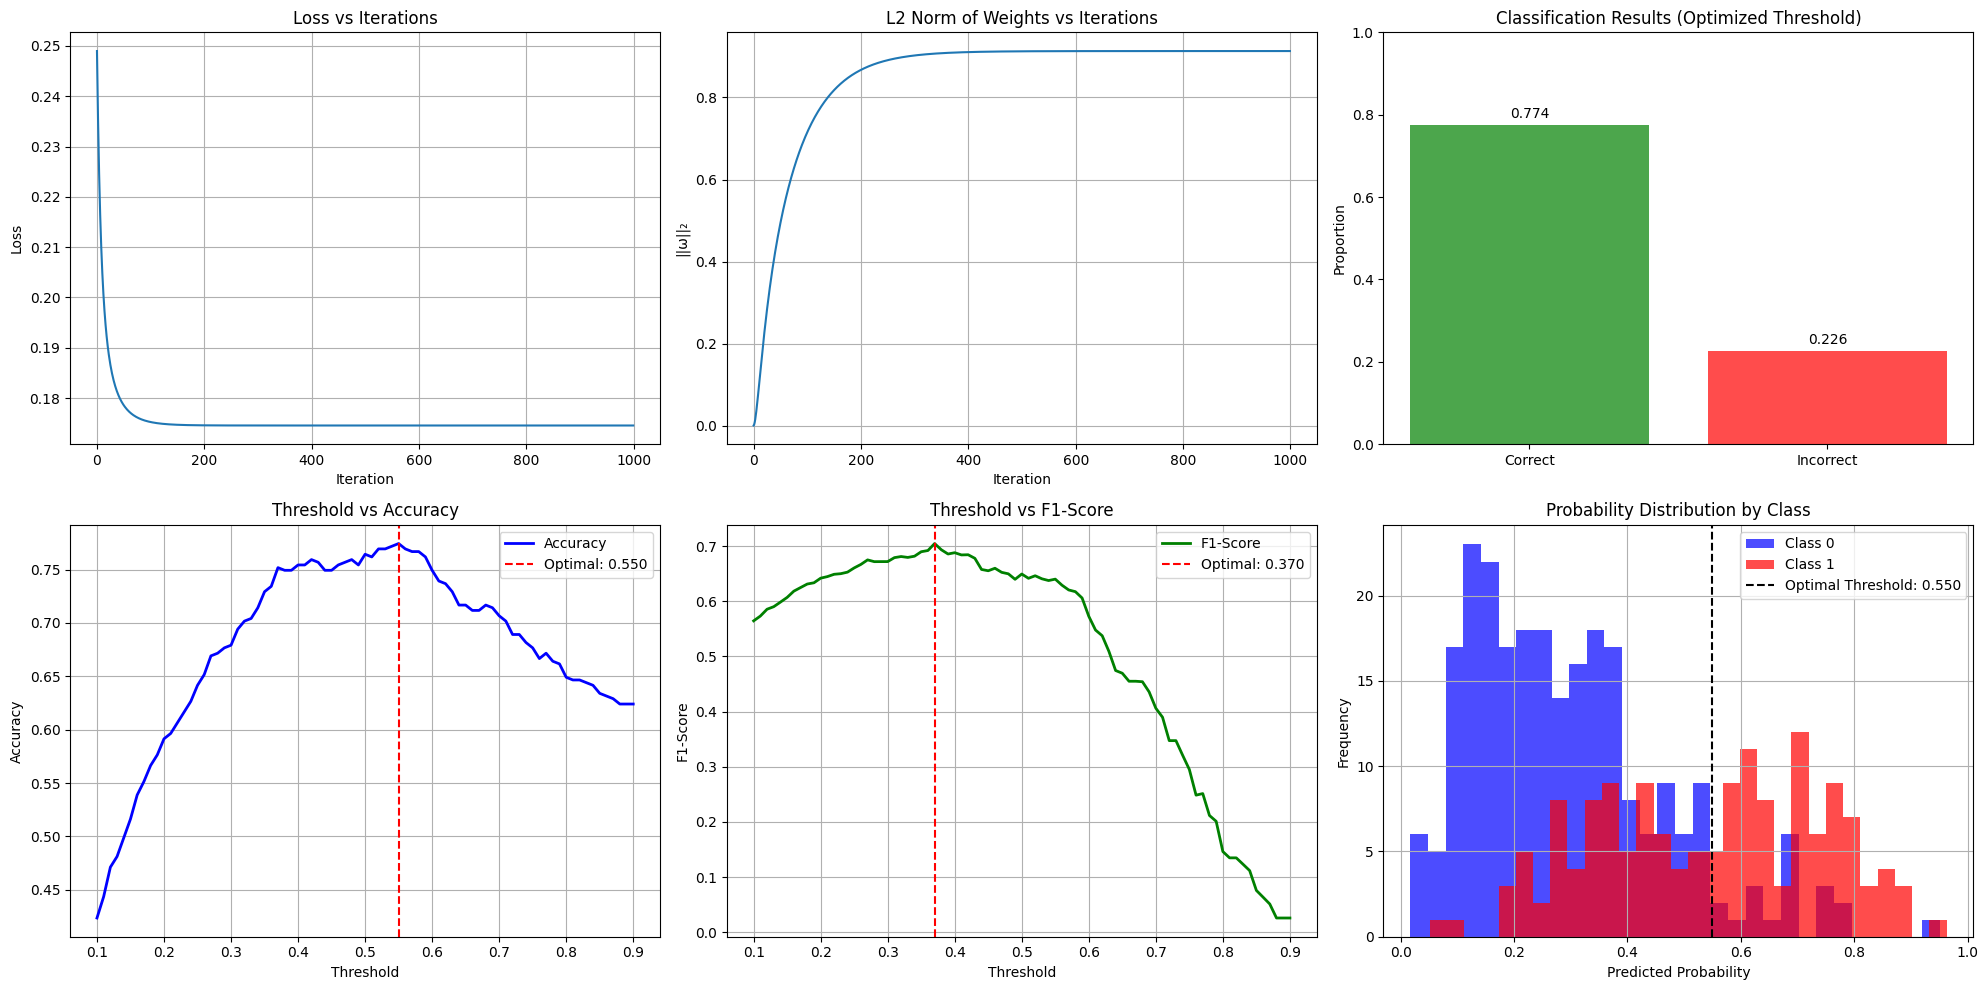

In [19]:
X_train = diabetesData.iloc[:, :-1].values  # All columns except 'Outcome'
y_train = diabetesData.iloc[:, -1].values   # 'Outcome' column

# Normalize the input features
X_train, mean, std = normalizeData(X_train)

# Define hyperparameter ranges
reg_types = ['none', 'ridge', 'lasso']
lambda_range = np.array([0.001, 0.005, 0.01, 0.1, 1.0])  # Lambda values
learning_rate_range = np.array([0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6])  # Learning rates
num_samples = 200  # Number of random combinations to test

# Initialize variables to track the best parameters
best_accuracy = 0
best_params = {}

# Perform random search
print("Performing random search for hyperparameter tuning...")
for _ in range(num_samples):
    # Randomly sample hyperparameters using NumPy
    reg = reg_types[np.random.randint(0, len(reg_types))]  # Randomly select a regularization type
    lam = lambda_range[np.random.randint(0, len(lambda_range))]  # Randomly select a lambda value
    lr = learning_rate_range[np.random.randint(0, len(learning_rate_range))]  # Randomly select a learning rate
    
    # Skip invalid combinations (e.g., lambda for 'none' regularization)
    if reg == 'none' and lam != 0.001:
        continue
    
    # Train the model with the sampled hyperparameters
    w, b, _, _ = train(X_train, y_train, reg=reg, Lambda=lam, eta=lr, max_iter=500)
    
    # Make predictions
    y_pred = predict(X_train, w, b)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_train)
    
    # Update the best parameters if the current combination is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'reg': reg, 'lambda': lam, 'eta': lr}

# Print the best parameters and accuracy
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_accuracy:.4f}")

# Train final model with best parameters - now gets norms directly
w_best, b_best, losses, norms = train(
    X_train, y_train, 
    reg=best_params['reg'], 
    Lambda=best_params['lambda'], 
    eta=best_params['eta'], 
    max_iter=1000
)

# Remove the separate train_with_norms function call since train now returns norms

# Continue with threshold optimization
print("\nOptimizing threshold...")

# Find optimal thresholds for different metrics
optimal_acc_thresh, best_acc, thresholds, acc_scores = find_optimal_threshold(X_train, y_train, w_best, b_best, 'accuracy')
optimal_f1_thresh, best_f1, _, f1_scores = find_optimal_threshold(X_train, y_train, w_best, b_best, 'f1')

print(f"Optimal threshold for accuracy: {optimal_acc_thresh:.3f} (accuracy: {best_acc:.4f})")
print(f"Optimal threshold for F1-score: {optimal_f1_thresh:.3f} (F1: {best_f1:.4f})")

# Use the accuracy-optimized threshold for final evaluation
y_train_pred = predict(X_train, w_best, b_best, optimal_acc_thresh)
classification_error = np.mean(y_train_pred != y_train)
accuracy = 1 - classification_error

print(f"\nFinal Results (with optimized threshold):")
print(f"Training Accuracy: {accuracy:.4f}")
print(f"Classification Error: {classification_error:.4f}")
print(f"Optimal threshold used: {optimal_acc_thresh:.3f}")

# Store the optimal threshold for test predictions
optimal_threshold = optimal_acc_thresh

# Create comprehensive plots (keeping the existing plotting code)
plt.figure(figsize=(20, 10))

# Plot 1: Loss vs Iterations
plt.subplot(2, 3, 1)
plt.plot(losses)
plt.title('Loss vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

# Plot 2: L2 Norm of weights vs Iterations
plt.subplot(2, 3, 2)
plt.plot(norms)
plt.title('L2 Norm of Weights vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('||ω||₂')
plt.grid(True)

# Plot 3: Training Results Summary
plt.subplot(2, 3, 3)
categories = ['Correct', 'Incorrect']
values = [accuracy, classification_error]
colors = ['green', 'red']
bars = plt.bar(categories, values, color=colors, alpha=0.7)
plt.title('Classification Results (Optimized Threshold)')
plt.ylabel('Proportion')
plt.ylim(0, 1)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# Plot 4: Threshold vs Accuracy
plt.subplot(2, 3, 4)
plt.plot(thresholds, acc_scores, 'b-', label='Accuracy', linewidth=2)
plt.axvline(x=optimal_acc_thresh, color='r', linestyle='--', label=f'Optimal: {optimal_acc_thresh:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.legend()
plt.grid(True)

# Plot 5: Threshold vs F1-Score
plt.subplot(2, 3, 5)
plt.plot(thresholds, f1_scores, 'g-', label='F1-Score', linewidth=2)
plt.axvline(x=optimal_f1_thresh, color='r', linestyle='--', label=f'Optimal: {optimal_f1_thresh:.3f}')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('Threshold vs F1-Score')
plt.legend()
plt.grid(True)

# Plot 6: Probability Distribution
plt.subplot(2, 3, 6)
train_probs = sigProg(X_train, w_best, b_best)
plt.hist(train_probs[y_train == 0], bins=30, alpha=0.7, label='Class 0', color='blue')
plt.hist(train_probs[y_train == 1], bins=30, alpha=0.7, label='Class 1', color='red')
plt.axvline(x=optimal_acc_thresh, color='black', linestyle='--', label=f'Optimal Threshold: {optimal_acc_thresh:.3f}')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution by Class')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Q12.** Testing on previously unseen test data - final part.

1. Load the DiabetesTest.csv file.
2. Use your best trained model to predict the 'Outcome' for this test data, assign your predictions to y_test_pred, this should be an array of $0$'s and $1$'s.
3. This will be graded on the level of accuracy of your predictions.
4. Remember to properly normalize your data before using them in the model. For normalization use the mean and standard deviation of the training data not the test data.


In [20]:
testData = pd.read_csv('DiabetesTest.csv')

In [21]:

test_X = testData.values 

test_X, _, _ = normalizeData(test_X, mean, std)

y_test_pred = predict(test_X, w_best, b_best, optimal_threshold)
